In [3]:
!pip install --upgrade pip
!pip install xgboost scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')

In [5]:
df=df.copy()

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

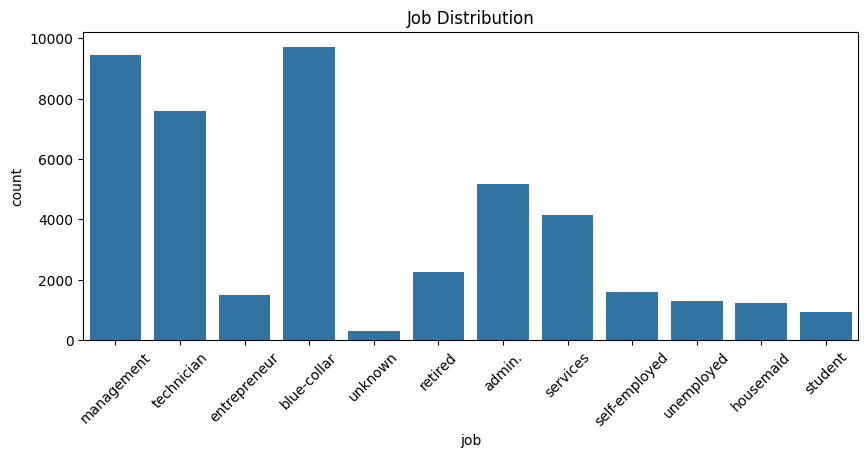

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df['job'])
plt.xticks(rotation=45)
plt.title("Job Distribution")
plt.show()

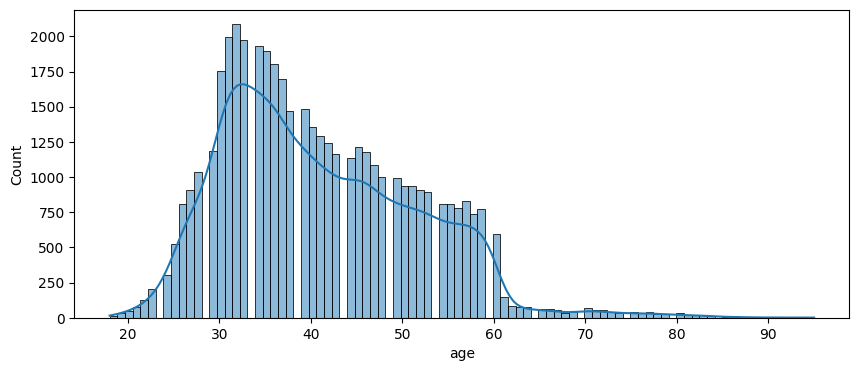

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(df['age'], kde=True)
plt.show()

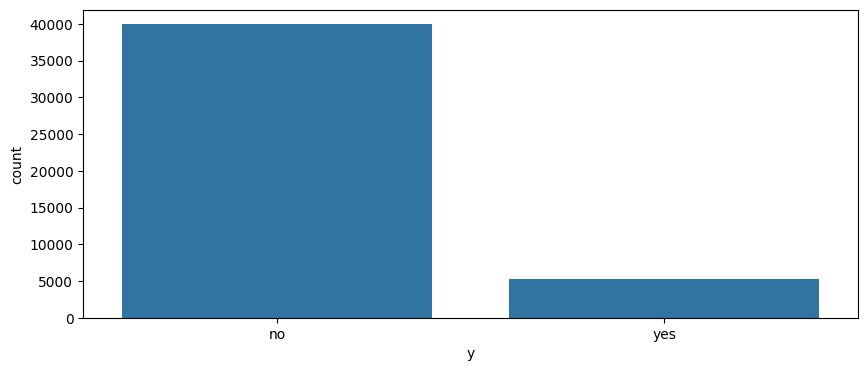

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['y'])
plt.show()

In [14]:
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
total_counts = df.shape[0]
unknown_percentage = (unknown_counts / total_counts) * 100
print(unknown_counts)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [15]:
df.shape

(45211, 17)

In [16]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [17]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [18]:
df.drop(df[df['education'] == 'unknown'].index, inplace=True)
df.drop(df[df['job'] == 'unknown'].index, inplace=True)

In [19]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts()

y
0    38172
1     5021
Name: count, dtype: int64

In [20]:
df['job'] = df['job'].map({
    'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3,
    'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7,
    'student': 8, 'technician': 9, 'unemployed': 10})
df['marital'] = df['marital'].map({'married': 0, 'single': 1, 'divorced': 2})

In [21]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_mapping)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,0,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,9,1,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,2,0,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
5,35,4,0,tertiary,no,231,yes,no,unknown,5,5,139,1,-1,0,unknown,0
6,28,4,1,tertiary,no,447,yes,yes,unknown,5,5,217,1,-1,0,unknown,0


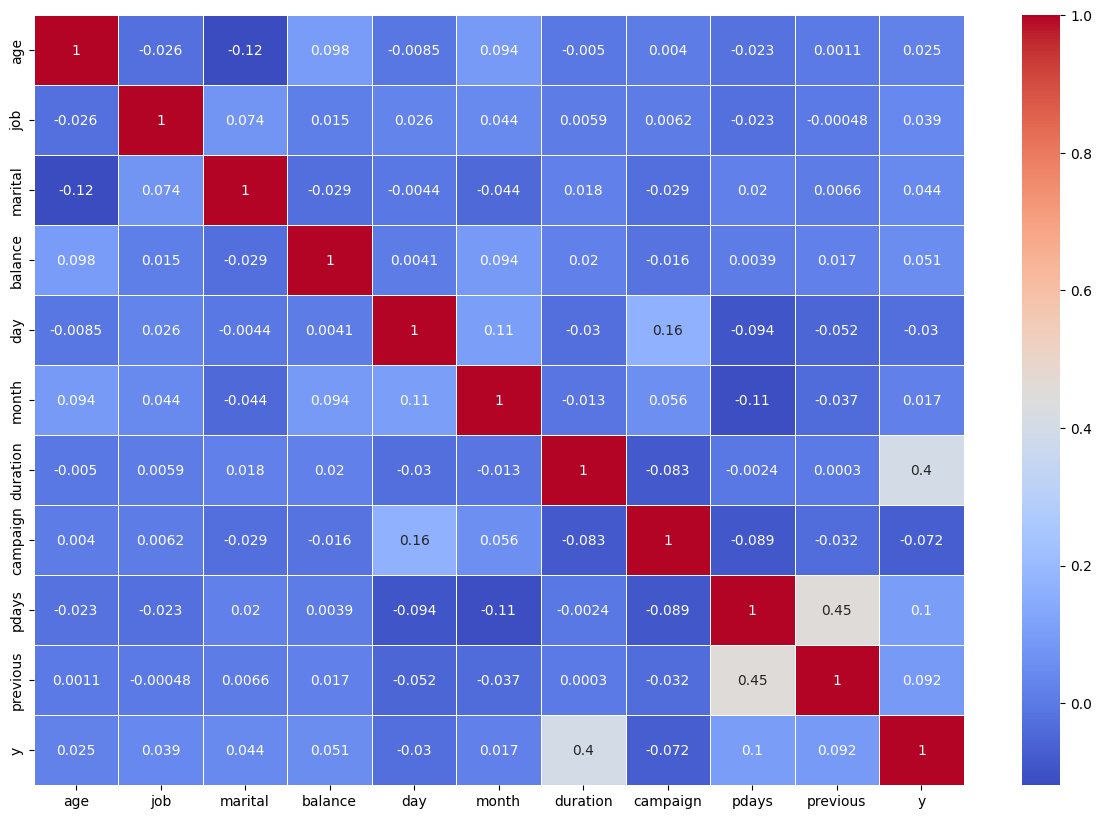

In [23]:
plt.figure(figsize=(15,10))
numeric_df = df.select_dtypes(include=np.number) # Now np is recognized
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [24]:
X = df.drop('y', axis=1)
y = df['y']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34554, 16) (8639, 16) (34554,) (8639,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df['month'] = df['month'].map(month_mapping).fillna(0).astype(int)

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression(max_iter=2000, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print('Logistic Regression Accuracy:', accuracy_lr)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', class_report_lr)

Logistic Regression Accuracy: 0.893158930431763
Confusion Matrix:
 [[7496  162]
 [ 761  220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7658
           1       0.58      0.22      0.32       981

    accuracy                           0.89      8639
   macro avg       0.74      0.60      0.63      8639
weighted avg       0.87      0.89      0.87      8639



In [27]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9054288690820697


In [28]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.9055446232202802

In [29]:
data = pd.read_csv('/kaggle/input/bank-marketing/bank/bank-full.csv', sep=';')
df = data.copy()

df.drop(df[df['education'] == 'unknown'].index, inplace=True)
df.drop(df[df['job'] == 'unknown'].index, inplace=True)

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_mapping).fillna(0).astype(int)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression(max_iter=2000, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

model_accuracies = {'Logistic Regression': accuracy_lr,'Random Forest': rf_accuracy,'XGBoost': xgb_accuracy
}

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/bank-marketing/bank/bank-full.csv'

In [28]:
class_report_lr = classification_report(y_test, y_pred_lr)
print('Logistic Regression Classification Report:\n', class_report_lr)

rf_class_report = classification_report(y_test, y_pred_rf)
print('Random Forest Classifier Classification Report:\n', rf_class_report)

xgb_class_report = classification_report(y_test, y_pred_xgb)
print('XGBoost Classifier Classification Report:\n', xgb_class_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7658
           1       0.59      0.23      0.33       981

    accuracy                           0.89      8639
   macro avg       0.75      0.61      0.64      8639
weighted avg       0.87      0.89      0.87      8639

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7658
           1       0.64      0.41      0.50       981

    accuracy                           0.91      8639
   macro avg       0.78      0.69      0.73      8639
weighted avg       0.90      0.91      0.90      8639

XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7658
           1       0.64      0.51      0.56       981

    accuracy                           0.91   